In [11]:
# implement svm using dataset

import numpy as np
from sklearn import datasets
from sklearn.svm import SVC

# Import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

# Filter the dataset to include only two classes
# For example, let's consider class 0 (Setosa) and class 1 (Versicolor)
X = X[y != 2]  # Keep samples where the target label is not equal to 2 (Virginica)
y = y[y != 2]  # Keep corresponding target labels

# Create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = SVC(kernel='linear', C=C).fit(X, y)

# Create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

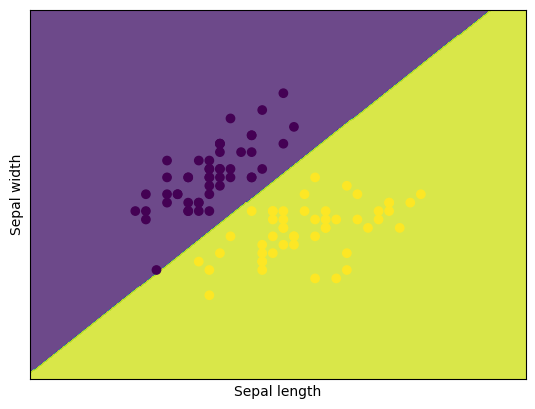

In [12]:
# Plot the contour and training examples
import matplotlib.pyplot as plt
# cmap=plt.cm.Paired
from matplotlib import colormaps
viridis = colormaps['viridis']
plt.contourf(xx, yy, Z, cmap=viridis, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=viridis)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()


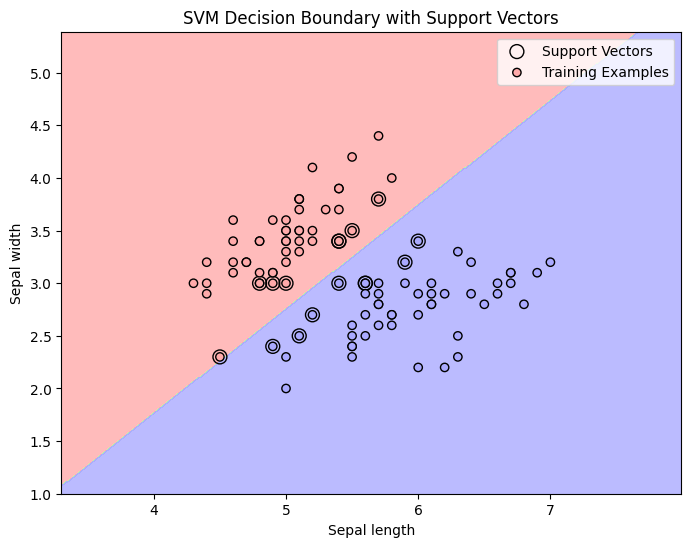

In [15]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define colormap for the classes
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

# Plot the contour and training examples
plt.figure(figsize=(8, 6))

# Plot decision boundary
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

# Plot support vectors
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

# Plot training examples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_light, marker='o', edgecolor='k', label='Training Examples')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('SVM Decision Boundary with Support Vectors')
plt.legend()
plt.show()


SVM from Scratch

In [ ]:
import numpy as np

class SVM:
  def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
      self.lr = learning_rate
      self.lambda_param = lambda_param
      self.n_iters = n_iters
      self.w = None
      self.b = None

  def fit(self, X, y):
      n_samples, n_features = X.shape
      y_ = np.where(y <= 0, -1, 1)
      self.w = np.zeros(n_features)
      self.b = 0

      for _ in range(self.n_iters):
          for idx, x_i in enumerate(X):
              condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
              if condition:
                  self.w -= self.lr * (2 * self.lambda_param * self.w)
              else:
                  self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                  self.b -= self.lr * y_[idx]


  def predict(self, X):
      approx = np.dot(X, self.w) - self.b
      return np.sign(approx)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_blobs(
    n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=74
)
y = np.where(y == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=15
)

clf = SVM()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

print("SVM classification accuracy", accuracy(y_test, predictions))

SVM classification accuracy 1.0


In [ ]:
def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, cmap='viridis')

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "r--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "g")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "g")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()

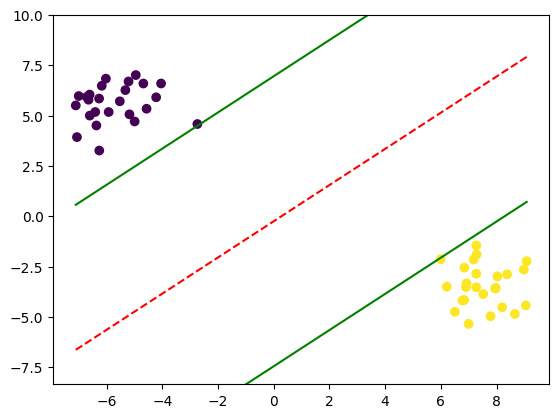

In [ ]:
visualize_svm()

Using Data Points

In [ ]:
from sklearn.svm import SVC

# X = np.array([[3,4],[1,4],[2,3],[6,-1],[7,-1],[5,-3]] )
X = np.array([[1,0],[0,1],[0,-1],[3,1],[3,2],[4,0]] )
y = np.array([-1,-1, -1, 1, 1 , 1 ])

clf = SVC(C = 1e5, kernel = 'linear')
clf.fit(X, y)

print('w = ',clf.coef_)
print('b = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
print('Support vectors = \n', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))

w =  [[0.8 0.4]]
b =  [-1.8]
Indices of support vectors =  [0 3]
Support vectors = 
 [[1. 0.]
 [3. 1.]]
Number of support vectors for each class =  [1 1]
Coefficients of the support vector in the decision function =  [[0.4 0.4]]
